In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
lr_list = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2, 1e-1, 3e-1, 1e-0, 3e-0]
q1 = 0.125
q2 = 0.875

Peak test accuracy for SketchySGD:  65.37472131709826
Peak test accuracy for SGD:  58.96930200651689
Peak test accuracy for Adam:  64.24283999314011


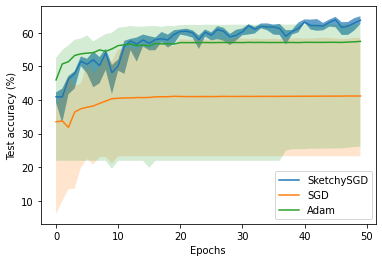

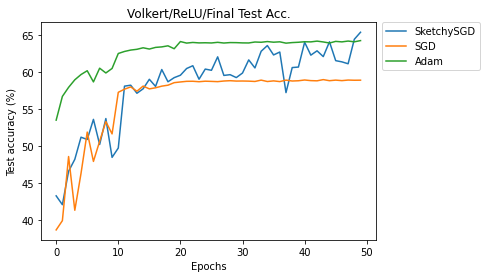

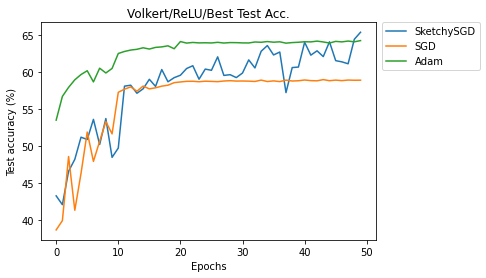

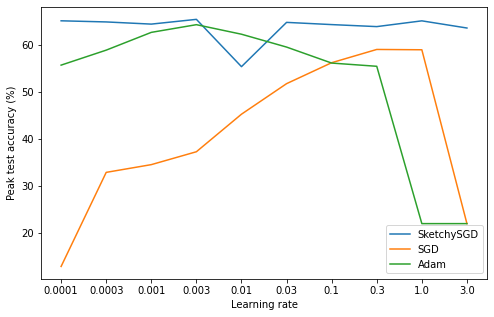

In [7]:
# Plot robustness curves for SketchySGD, SGD, Adam
# ReLU activation
n_epochs = 50
sketchysgd_test_acc_mat = np.zeros((len(lr_list), n_epochs))
sgd_test_acc_mat = np.zeros((len(lr_list), n_epochs))
adam_test_acc_mat = np.zeros((len(lr_list), n_epochs))

for i, lr in enumerate(lr_list):
    sketchysgd_data = pd.read_csv("sketchysgd/volkert/run_lr_rho_eq_prop_2_relu/volkert_lr_"+str(lr)+"_rho_"+str(lr)+".csv")
    sketchysgd_test_acc = sketchysgd_data["test_acc"].to_numpy()
    sketchysgd_test_acc_mat[i, 0:sketchysgd_test_acc.shape[0]] = sketchysgd_test_acc

    sgd_data = pd.read_csv("sgd/volkert/run_2_relu/volkert_lr_"+str(lr)+".csv")
    sgd_test_acc = sgd_data["test_acc"].to_numpy()
    sgd_test_acc_mat[i, :] = sgd_test_acc

    adam_data = pd.read_csv("adam/volkert/run_2_relu/volkert_lr_"+str(lr)+".csv")
    adam_test_acc = adam_data["test_acc"].to_numpy()
    adam_test_acc_mat[i, :] = adam_test_acc  

opts = ["SketchySGD", "SGD", "Adam"]
test_acc_list = [sketchysgd_test_acc_mat, sgd_test_acc_mat, adam_test_acc_mat]
# opts = ["SketchySGD", "Adam"]
# test_acc_list = [sketchysgd_test_acc_mat, adam_test_acc_mat]

plt.figure()
for i, optimizer in enumerate(opts):
    test_acc_df = pd.DataFrame(test_acc_list[i])
    quantile_df = pd.DataFrame({'median': test_acc_df.median(), 
                                'lower': test_acc_df.quantile(q1), 'upper': test_acc_df.quantile(q2)})

    plt.plot(quantile_df['median'], label = optimizer)
    shading = 0.7 if optimizer == "SketchySGD" else 0.2
    plt.fill_between(range(n_epochs), quantile_df['lower'], quantile_df['upper'], alpha = shading)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel("Epochs")
plt.ylabel("Test accuracy (%)")
plt.legend(bbox_to_anchor=(0.99, 0.02), loc='lower right', borderaxespad=0)
# plt.title("Volkert/ReLU/Robustness")

plt.savefig('volkert.pdf')

# Plot best curves of final test accuracy for SketchySGD, SGD, Adam, AdamW
plt.figure()
for i, optimizer in enumerate(opts):
    test_acc_mat = test_acc_list[i]
    best_curve_idx = np.argmax(test_acc_mat[:, n_epochs - 1])
    best_curve = test_acc_mat[best_curve_idx, :]
    plt.plot(best_curve, label = optimizer)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel("Epochs")
plt.ylabel("Test accuracy (%)")
plt.title("Volkert/ReLU/Final Test Acc.")

# Plot best curves of highest possible test accuracy for SketchySGD, SGD, Adam, AdamW
plt.figure(123)
plt.figure(246, figsize = (8, 5))
for i, optimizer in enumerate(opts):
    test_acc_mat = test_acc_list[i]
    highest_accs = np.amax(test_acc_mat, axis = 1) # Get the best test accuracy from each curve
    best_curve_idx = np.argmax(highest_accs)
    print("Peak test accuracy for "+optimizer+": ",highest_accs[best_curve_idx])
    best_curve = test_acc_mat[best_curve_idx, :]
    
    plt.figure(123)
    plt.plot(best_curve, label = optimizer)

    plt.figure(246)
    plt.plot(highest_accs, label = optimizer)

plt.figure(123)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel("Epochs")
plt.ylabel("Test accuracy (%)")
plt.title("Volkert/ReLU/Best Test Acc.")

plt.figure(246)
plt.legend(bbox_to_anchor=(0.99, 0.02), loc='lower right', borderaxespad=0)
plt.xlabel("Learning rate")
plt.ylabel("Peak test accuracy (%)")
plt.xticks(range(len(lr_list)))
plt.gca().set_xticklabels(lr_list)

plt.savefig('volkert_lr_acc.pdf')